# UNICEF MICS Survey data analysis

Understanding features that can predict why a caretaker might have a vaccination card using classification algorithms

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from  sklearn.preprocessing import  StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import classification_report

Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [95]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168

ch_df = pd.read_csv('ch.csv',low_memory=False)

In [96]:
ch_df.describe()

,Unnamed: 0,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
count,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,...,25192.000000,25192.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000,26018.000000
mean,13009.500000,765.843147,10.391959,6.122108,765.843147,10.391959,6.122108,2.889423,11.521255,14.596164,...,2.987496,984.930970,1.822815,1.581098,3.112845,0.968253,-0.107336,2.519217,765.843147,19.632601
std,7510.893988,429.034000,5.756146,3.017196,429.034000,5.756146,3.017196,2.431748,2.895621,7.412582,...,1.427527,1017.925784,0.879074,0.568260,1.603637,1.050827,0.968301,1.414660,429.034000,10.722314
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.574326,0.000000,1.000000,1.000000
25%,6505.250000,394.000000,5.000000,4.000000,394.000000,5.000000,4.000000,2.000000,9.000000,9.000000,...,2.000000,417.000000,1.000000,1.000000,2.000000,0.430426,-0.950428,1.000000,394.000000,10.000000
50%,13009.500000,764.000000,10.000000,5.000000,764.000000,10.000000,5.000000,2.000000,12.000000,15.000000,...,3.000000,909.000000,2.000000,2.000000,3.000000,0.677064,-0.260526,2.000000,764.000000,20.000000
75%,19513.750000,1138.000000,15.000000,7.000000,1138.000000,15.000000,7.000000,2.000000,14.000000,21.000000,...,4.000000,1384.000000,3.000000,2.000000,4.000000,1.161744,0.639379,4.000000,1138.000000,29.000000
max,26018.000000,1480.000000,20.000000,41.000000,1480.000000,20.000000,41.000000,39.000000,18.000000,30.000000,...,5.000000,9999.000000,9.000000,9.000000,6.000000,14.433318,3.008995,5.000000,1480.000000,37.000000


In [97]:
columnNumbers = [x for x in range(ch_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
ch_df = ch_df.iloc[:, columnNumbers] #return all columns except 0th column
ch_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGE_11,CAGED,melevel,religion,zone,chweight,wscore,windex5,PSU,stratum
0,1,4,6,1,4,6,2,15,21,2,...,5.0,1656.0,3,1,4,1.262202,1.653178,5,1,1
1,1,5,5,1,5,5,2,12,21,2,...,3.0,1031.0,2,1,4,1.262202,1.973658,5,1,1
2,1,5,6,1,5,6,2,12,21,2,...,4.0,1320.0,2,1,4,1.262202,1.973658,5,1,1
3,1,6,3,1,6,3,2,11,21,2,...,1.0,164.0,3,1,4,1.262202,1.964425,5,1,1
4,1,7,4,1,7,4,2,16,21,2,...,4.0,1162.0,3,1,4,1.262202,1.638443,5,1,1


In [98]:
wm_df = pd.read_csv('wm.csv', low_memory = False)

In [99]:
columnNumbers = [x for x in range(wm_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
wm_df = wm_df.iloc[:, columnNumbers] #return all columns except 0th column
wm_df.head()

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CSURV,CDEAD,welevel,religion,zone,wmweight,wscore,windex5,PSU,stratum
0,1,1,3,1,1,3,16,4,3,2011,...,0.0,0.0,3.0,1,4,1.199659,1.580774,5,1,1
1,1,2,2,1,2,2,7,4,3,2011,...,0.0,0.0,3.0,1,4,1.199659,1.355768,5,1,1
2,1,3,2,1,3,2,7,21,2,2011,...,0.0,0.0,3.0,1,4,1.199659,1.351060,5,1,1
3,1,4,2,1,4,2,16,21,2,2011,...,4.0,0.0,3.0,1,4,1.199659,1.653178,5,1,1
4,1,6,2,1,6,2,11,21,2,2011,...,1.0,1.0,3.0,1,4,1.199659,1.964425,5,1,1


In [100]:
ch_wm_df = ch_df.merge(wm_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [101]:
ch_wm_df = ch_wm_df[ch_wm_df.columns.drop(list(ch_wm_df.filter(regex='_y')))]

In [102]:
ch_wm_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,WDOM,WAGEM,WDOBFC,WDOBLC,MSTATUS,CEB,CSURV,CDEAD,welevel,wmweight
0,1,4,6,1,4,6,2,15,21,2,...,1204.0,27.0,1222.0,1280.0,1.0,4.0,4.0,0.0,3.0,1.199659
1,1,6,3,1,6,3,2,11,21,2,...,1307.0,29.0,1329.0,1329.0,1.0,2.0,1.0,1.0,3.0,1.199659
2,1,7,4,1,7,4,2,16,21,2,...,1201.0,22.0,1236.0,1320.0,1.0,3.0,3.0,0.0,3.0,1.199659
3,1,7,5,1,7,5,2,16,21,2,...,1201.0,22.0,1236.0,1320.0,1.0,3.0,3.0,0.0,3.0,1.199659
4,1,8,5,1,8,5,2,15,21,4,...,1220.0,26.0,1229.0,1289.0,1.0,3.0,3.0,0.0,3.0,1.199659


In [103]:
hh_df = pd.read_csv('hh.csv', low_memory = False)

In [104]:
columnNumbers = [x for x in range(hh_df.shape[1])]  # list of columns' integer indices

columnNumbers.remove(0) #removing column integer index 0
hh_df = hh_df.iloc[:, columnNumbers] #return all columns except 0th column
hh_df.head()

,HH1,HH2,HH3,HH4,HH5D,HH5M,HH5Y,HH6,HH7,HH9,...,SI1,HHSEX,religion,zone,helevel,hhweight,wscore,windex5,PSU,stratum
0,1,1,16,2,4,3,2011,1,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.580774,5,1,1
1,1,2,7,2,4,3,2011,1,1,1,...,3.0,2.0,1.0,4,1.0,1.250765,1.355768,5,1,1
2,1,3,7,2,21,2,2011,1,1,1,...,3.0,2.0,1.0,4,2.0,1.250765,1.351060,5,1,1
3,1,4,15,2,21,2,2011,1,1,1,...,3.0,1.0,1.0,4,3.0,1.250765,1.653178,5,1,1
4,1,5,12,2,21,2,2011,1,1,1,...,3.0,1.0,1.0,4,2.0,1.250765,1.973658,5,1,1


In [105]:
df = ch_wm_df.merge(hh_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [106]:
df = df[df.columns.drop(list(df.filter(regex='_y')))]

In [107]:
df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,HW4,HW5A,HW5B,HW5C,HW5D,HW5Y,SI1,HHSEX,helevel,hhweight
0,1,4,6,1,4,6,2,15,21,2,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
1,1,6,3,1,6,3,2,11,21,2,...,1.0,NaN,B,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
2,1,7,4,1,7,4,2,16,21,2,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
3,1,7,5,1,7,5,2,16,21,2,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.250765
4,1,8,5,1,8,5,2,15,21,4,...,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.250765


Remove ID columns

In [108]:
df = df.loc[:, ~df.columns.str.startswith('UF')]
df = df.loc[:, ~df.columns.str.startswith('HH')]
df = df.loc[:, ~df.columns.str.startswith('LN')]
df.drop('AN1', axis=1, inplace=True)

In [109]:
df['IM1'].unique()

array([ 1.,  2.,  3., nan,  9.])

In [110]:
df['AG2'].unique()

array([ 4.,  0.,  3.,  1.,  2., nan])

In [111]:
#Columns removed as per Unicef's feedback. 
#The sample weights (chweight, hhweight, etc) should not be used as features. 
#You can use weighted logistic regression if you want to incorporate the sample weight, 
#in this case just use the children sample weight. 
#Similarly, I would not use PSU and Stratum as features. 
#If you use the administrative division (e.g. region) as a features it should capture the stratum variable.
df = df.loc[:, ~df.columns.str.startswith('chweight')]
df = df.loc[:, ~df.columns.str.startswith('hhweight')]
df = df.loc[:, ~df.columns.str.startswith('PSU')]
df = df.loc[:, ~df.columns.str.startswith('stratum')]

In [112]:
len(df)

39971

In [113]:
#The vaccination module is usually applied for children up to 3 years old. 
#You should subset the dataset to that target group before running the models. 
#If you don’t then most of card not seen for the older children will be because of missing data. 
#Unfortunately this means that you will have less data to model.
df = df.loc[df['AG2'] <= 3]
len(df)

30689

In [114]:
#Set the target to column IM1 - Has the card and the card is seen
#Seperate the target column from the df.

df['card_seen'] = np.where(df['IM1'] == 1, 1,0)

In [115]:
df = df.loc[:, ~df.columns.str.startswith('IM')]

In [116]:
df = df.fillna(0)

In [117]:
target = df['card_seen']
target.unique()

array([1, 0], dtype=int64)

In [118]:
#Creating a binary variable since by coding Yes to 1 and any other response as 0.

y=['card_seen']
df_vars =df.columns.values.tolist()
X=[i for i in df_vars]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(df[X],df[y].values.ravel(), test_size=0.3, random_state=0)

# Handling data imbalance by downsampling the minority class in Training data

In [120]:
df_majority = X_train[X_train.card_seen == 0]
df_minority = X_train[X_train.card_seen == 1]

print(len(df_majority))
print(len(df_minority))

min_class_len = len(df_minority)

16629
4853


In [121]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace= True,     # sample with replacement
                                 n_samples=min_class_len,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with downsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled.card_seen.value_counts()

1    4853
0    4853
Name: card_seen, dtype: int64

In [122]:
X_train = df_downsampled
len(X_train)

9706

In [123]:
y_train = df.loc[X_train.index.tolist(),:]
y_train = y_train['card_seen']

In [124]:
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='card_seen')))]

In [125]:
#One hot encoding of categorical values using get_dummies function

X_train = pd.get_dummies(X_train)
X_train.head()

,AG1D,AG1M,AG1Y,AG2,BR1,BR2,BR3,BR3A,BR4,EC1,...,HW5A_0,HW5A_A,HW5B_0,HW5B_B,HW5C_0,HW5C_C,HW5D_0,HW5D_D,HW5Y_0,HW5Y_Y
30058,4.0,2.0,2008.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
24545,13.0,7.0,2010.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,1,0,0,1,1,0,1,0,1,0
25749,19.0,6.0,2008.0,2.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0,1,0,1,1,0,1,0,1,0
2446,10.0,1.0,2008.0,3.0,1.0,0.0,0.0,1.0,0.0,3.0,...,0,1,1,0,1,0,1,0,1,0
23578,6.0,1.0,2010.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0,1,0,1,1,0,0,1,1,0


1	Yes	    - 6021   
2	No	    - 1279  
8	DK	    - 102	  
9	Missing - 3

# Logistic Regression Classifier

In [126]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [128]:
len(feature_importance)

815

In [129]:
feature_imp_data = list(zip(X_train, feature_importance))
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [130]:
people = people[0:50] 
score = score[0:50] 
x_pos = np.arange(len(people)) 

In [131]:
# Read the Labels File into a df
labels_df = pd.read_csv('label_nig.csv',low_memory=False)
labels_df.head()

,name,label
0,HH1,Cluster number
1,HH2,Household number
2,LN,Line number
3,UF1,Cluster number
4,UF2,Household number


In [132]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,BR1,0.687114
1,MN5,0.450925
2,MN4B,0.203782
3,wscore,0.199932
4,WS3,0.198831
5,HC8L,0.174616
6,BF10,0.172694
7,MN22A,0.170133
8,MN22,0.164970
9,HAZ,0.163886


In [133]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_LR_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,BR1,0.687114,Birth certificate
1,MN5,0.450925,NaN
2,MN4B,0.203782,NaN
3,wscore,0.199932,Combined wealth score
4,WS3,0.198831,Location of the water source
5,HC8L,0.174616,Water lifting pump
6,BF10,0.172694,NaN
7,MN22A,0.170133,NaN
8,MN22,0.164970,NaN
9,HAZ,0.163886,Height for age z-score NCHS


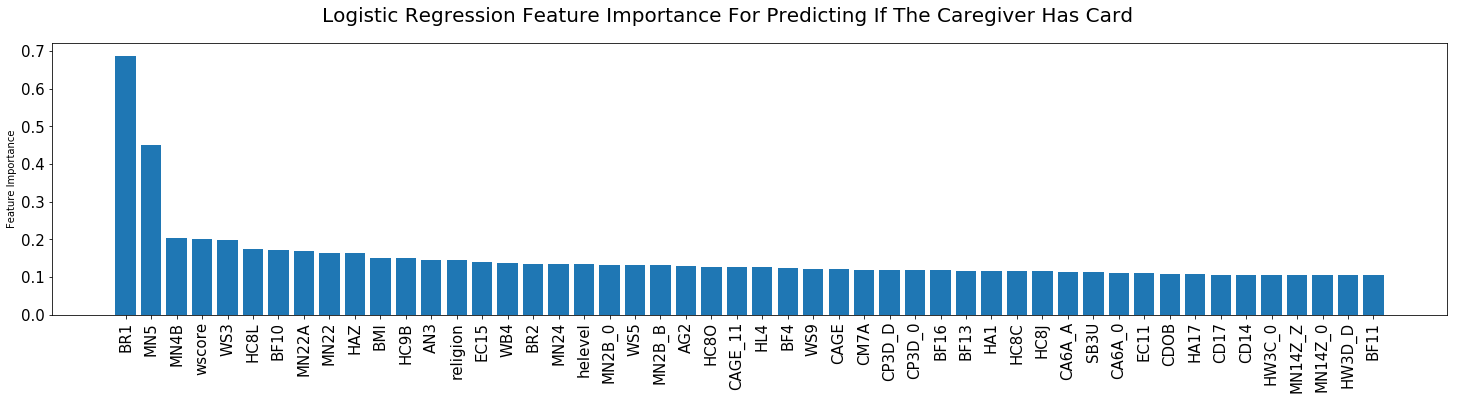

In [134]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Logistic Regression Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [135]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]
X_test.head()

,AG1D,AG1M,AG1Y,AG2,BR1,BR2,BR3,BR3A,BR4,EC1,...,HW5A_0,HW5A_A,HW5B_0,HW5B_B,HW5C_0,HW5C_C,HW5D_0,HW5D_D,HW5Y_0,HW5Y_Y
24155,18.0,4.0,2009.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
37822,98.0,8.0,2007.0,3.0,3.0,2.0,2.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
16132,15.0,10.0,2010.0,0.0,3.0,2.0,2.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
32409,15.0,8.0,2009.0,1.0,3.0,2.0,2.0,0.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3435,15.0,6.0,2007.0,3.0,3.0,2.0,1.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
X_test = pd.get_dummies(X_test)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


In [137]:
#Overall classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.55      0.70      7139
          1       0.37      0.92      0.53      2068

avg / total       0.83      0.64      0.66      9207



# Random Forest Classifier

Random Forests is an ensemble model which uses a large number of strong decision trees through bagging.
Each decision tree is built on a subset of features and a subset of rows from the data.
The model combines all of them in order to smooth out their predictions

In [138]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rfc = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [139]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.72


In [140]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.78      0.81      7139
          1       0.41      0.51      0.45      2068

avg / total       0.75      0.72      0.73      9207



Let's validate the results of Random Forests Model with kfold cross validation

In [141]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.733


In [142]:
feature_imp_data = list(zip(X_train, rfc.feature_importances_))

In [143]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [144]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,ED4B,0.027755
1,AG1D,0.025632
2,zone,0.016636
3,HC1B,0.015408
4,HC1C,0.013949
5,BR1,0.013741
6,MN22A,0.012104
7,CM12D,0.011027
8,WB3,0.010907
9,helevel,0.010741


In [145]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_RF_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,ED4B,0.027755,Highest grade completed at that level
1,AG1D,0.025632,Day of birth of child
2,zone,0.016636,NaN
3,HC1B,0.015408,Mother tongue of household head
4,HC1C,0.013949,NaN
5,BR1,0.013741,Birth certificate
6,MN22A,0.012104,NaN
7,CM12D,0.011027,NaN
8,WB3,0.010907,NaN
9,helevel,0.010741,Education of household head


In [146]:
people = people[0:50]
score = score[0:50]
x_pos = np.arange(len(people)) 

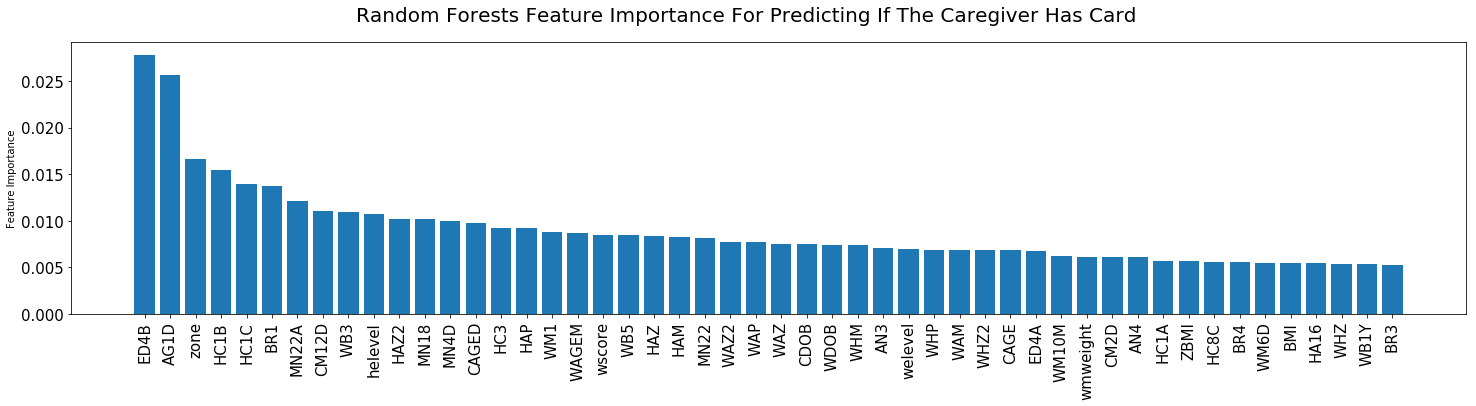

In [147]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Random Forests Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

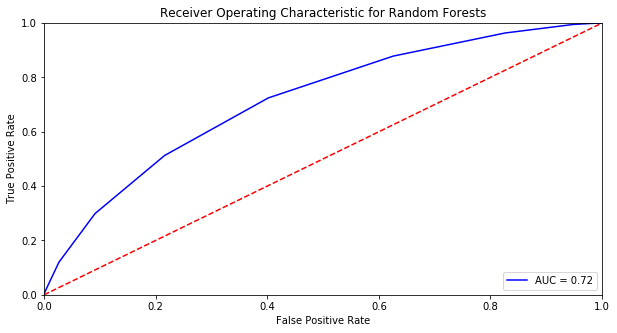

In [148]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Decision Tree Classifier

Gradient Boosting Decision Trees is an ensemble model which uses a sequence of weak constrained decision trees through boosting.
Each tree is allowed a maximum depth and hence tuned and each tree tries to correct the predictions of the trees before it.

In [149]:
gbd = GradientBoostingClassifier()
gbd = gbd.fit(X_train, y_train)

In [150]:
y_pred = gbd.predict(X_test)
print('Accuracy of gradient boosting decision tree classifier on test set: {:.2f}'.format(gbd.score(X_test, y_test)))

Accuracy of gradient boosting decision tree classifier on test set: 0.77


In [151]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbd, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.726


In [152]:
feature_imp_data = list(zip(X_train, gbd.feature_importances_))

In [153]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [154]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:100], columns=['name','Score'])
features_df

,name,Score
0,CAGED,0.061968
1,WM1,0.061966
2,BR1,0.046083
3,AG1D,0.038032
4,HC1C,0.032174
5,MN5,0.021524
6,HAM,0.019449
7,HC1B,0.019237
8,HAP,0.016912
9,WB5,0.016355


In [155]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_GB_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,CAGED,0.061968,Age in days
1,WM1,0.061966,NaN
2,BR1,0.046083,Birth certificate
3,AG1D,0.038032,Day of birth of child
4,HC1C,0.032174,NaN
5,MN5,0.021524,NaN
6,HAM,0.019449,Height for age percent of reference median NCHS
7,HC1B,0.019237,Mother tongue of household head
8,HAP,0.016912,Height for age percentile NCHS
9,WB5,0.016355,NaN


In [156]:
people = people[0:30]
score = score[0:30]
x_pos = np.arange(len(people)) 

In [157]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.77      0.84      7139
          1       0.50      0.78      0.61      2068

avg / total       0.83      0.77      0.79      9207



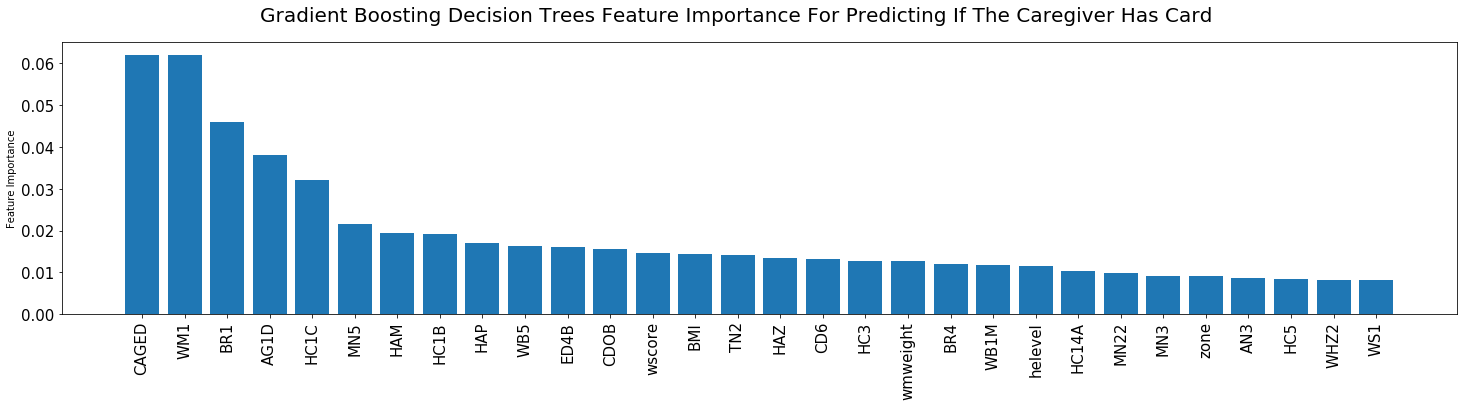

In [158]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Gradient Boosting Decision Trees Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

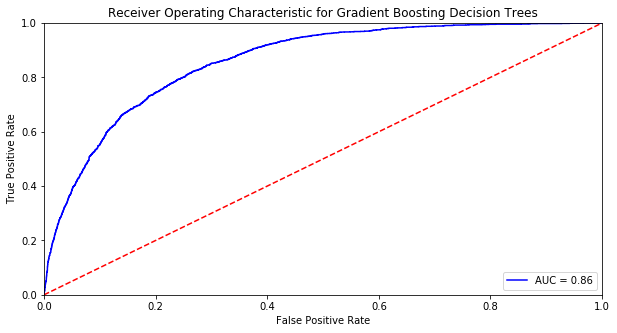

In [159]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gbd.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Gradient Boosting Decision Trees')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
print(final_df.head())
nan_df = final_df[final_df.label.isnull()]
len(nan_df)

    name     Score                  label
0  CAGED  0.061968            Age in days
1    WM1  0.061966                    NaN
2    BR1  0.046083      Birth certificate
3   AG1D  0.038032  Day of birth of child
4   HC1C  0.032174                    NaN


52

In [161]:
f_name_lst = list(nan_df.name)

In [162]:
final_df = final_df[~final_df['name'].isin(f_name_lst)]

In [163]:
final_df.sort_values('Score')

,name,Score,label
97,HW4,0.002781,Soap/other material available for washing hands
94,HC8J,0.002912,Sewing / Knitting machine
93,HAZ2,0.002930,Height for age z-score WHO
92,HC10,0.002930,Household owns the dwelling
91,WAP,0.002958,Weight for age percentile NCHS
89,TN12_4,0.003035,Person 4 who slept under net
87,CA3,0.003063,Child ate less or more during illness
84,EC11,0.003296,Child able to pick up small object with 2 fingers
81,HC14C,0.003349,Goats
76,WHP,0.003654,Weight for height percentile NCHS


In [164]:
selected_features = list(final_df.name)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [165]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
X_test = pd.get_dummies(X_test)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [167]:
feature_importance = (logreg.coef_[0])
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [168]:
col_list = list(X_train.columns[sorted_idx])
label_list = []
for i in col_list:
    label_row = final_df[final_df['name'] == i]
    label_list.append(list(label_row.label))

label_list = [''.join(x) for x in label_list]
print(label_list)

['Birth certificate', 'Mobile telephone', 'Religion of household head', 'Treat water to make safer for drinking', "Number of children's books or picture books for child", 'Person collecting water', 'Sewing / Knitting machine', 'Child able to pick up small object with 2 fingers', 'Year of birth of child', 'Weight for height percent of reference median NCHS', 'Weight for age z-score WHO', 'Day of birth of child', 'Height for age percentile NCHS', 'Weight for height z-score WHO', 'Height for age z-score WHO', 'Goats', 'Households using this toilet facility', 'Main material of exterior wall', 'Cattle, milk cows, buffaloes or bulls', 'Child ate less or more during illness', "Child's length or height (centimetres)", 'Weight for height percentile NCHS', 'Weight for age percentile NCHS', 'Time (in minutes) to get water and come back', 'Age in days', 'Acres of agricultural land members of household owns', 'Person 4 who slept under net', 'Type of toilet facility', 'Height for age percent of refe

In [169]:
result_df = pd.DataFrame({'Feature': label_list ,'Coefficient': feature_importance[sorted_idx],'Column' :col_list})
result_df.head()

,Coefficient,Column,Feature
0,-3.330619,BR1,Birth certificate
1,-1.015165,HC9B,Mobile telephone
2,-0.745419,HC1A,Religion of household head
3,-0.443842,WS6,Treat water to make safer for drinking
4,-0.263652,EC1,Number of children's books or picture books fo...


In [170]:
result_df.to_csv('result_Nigeria.csv')

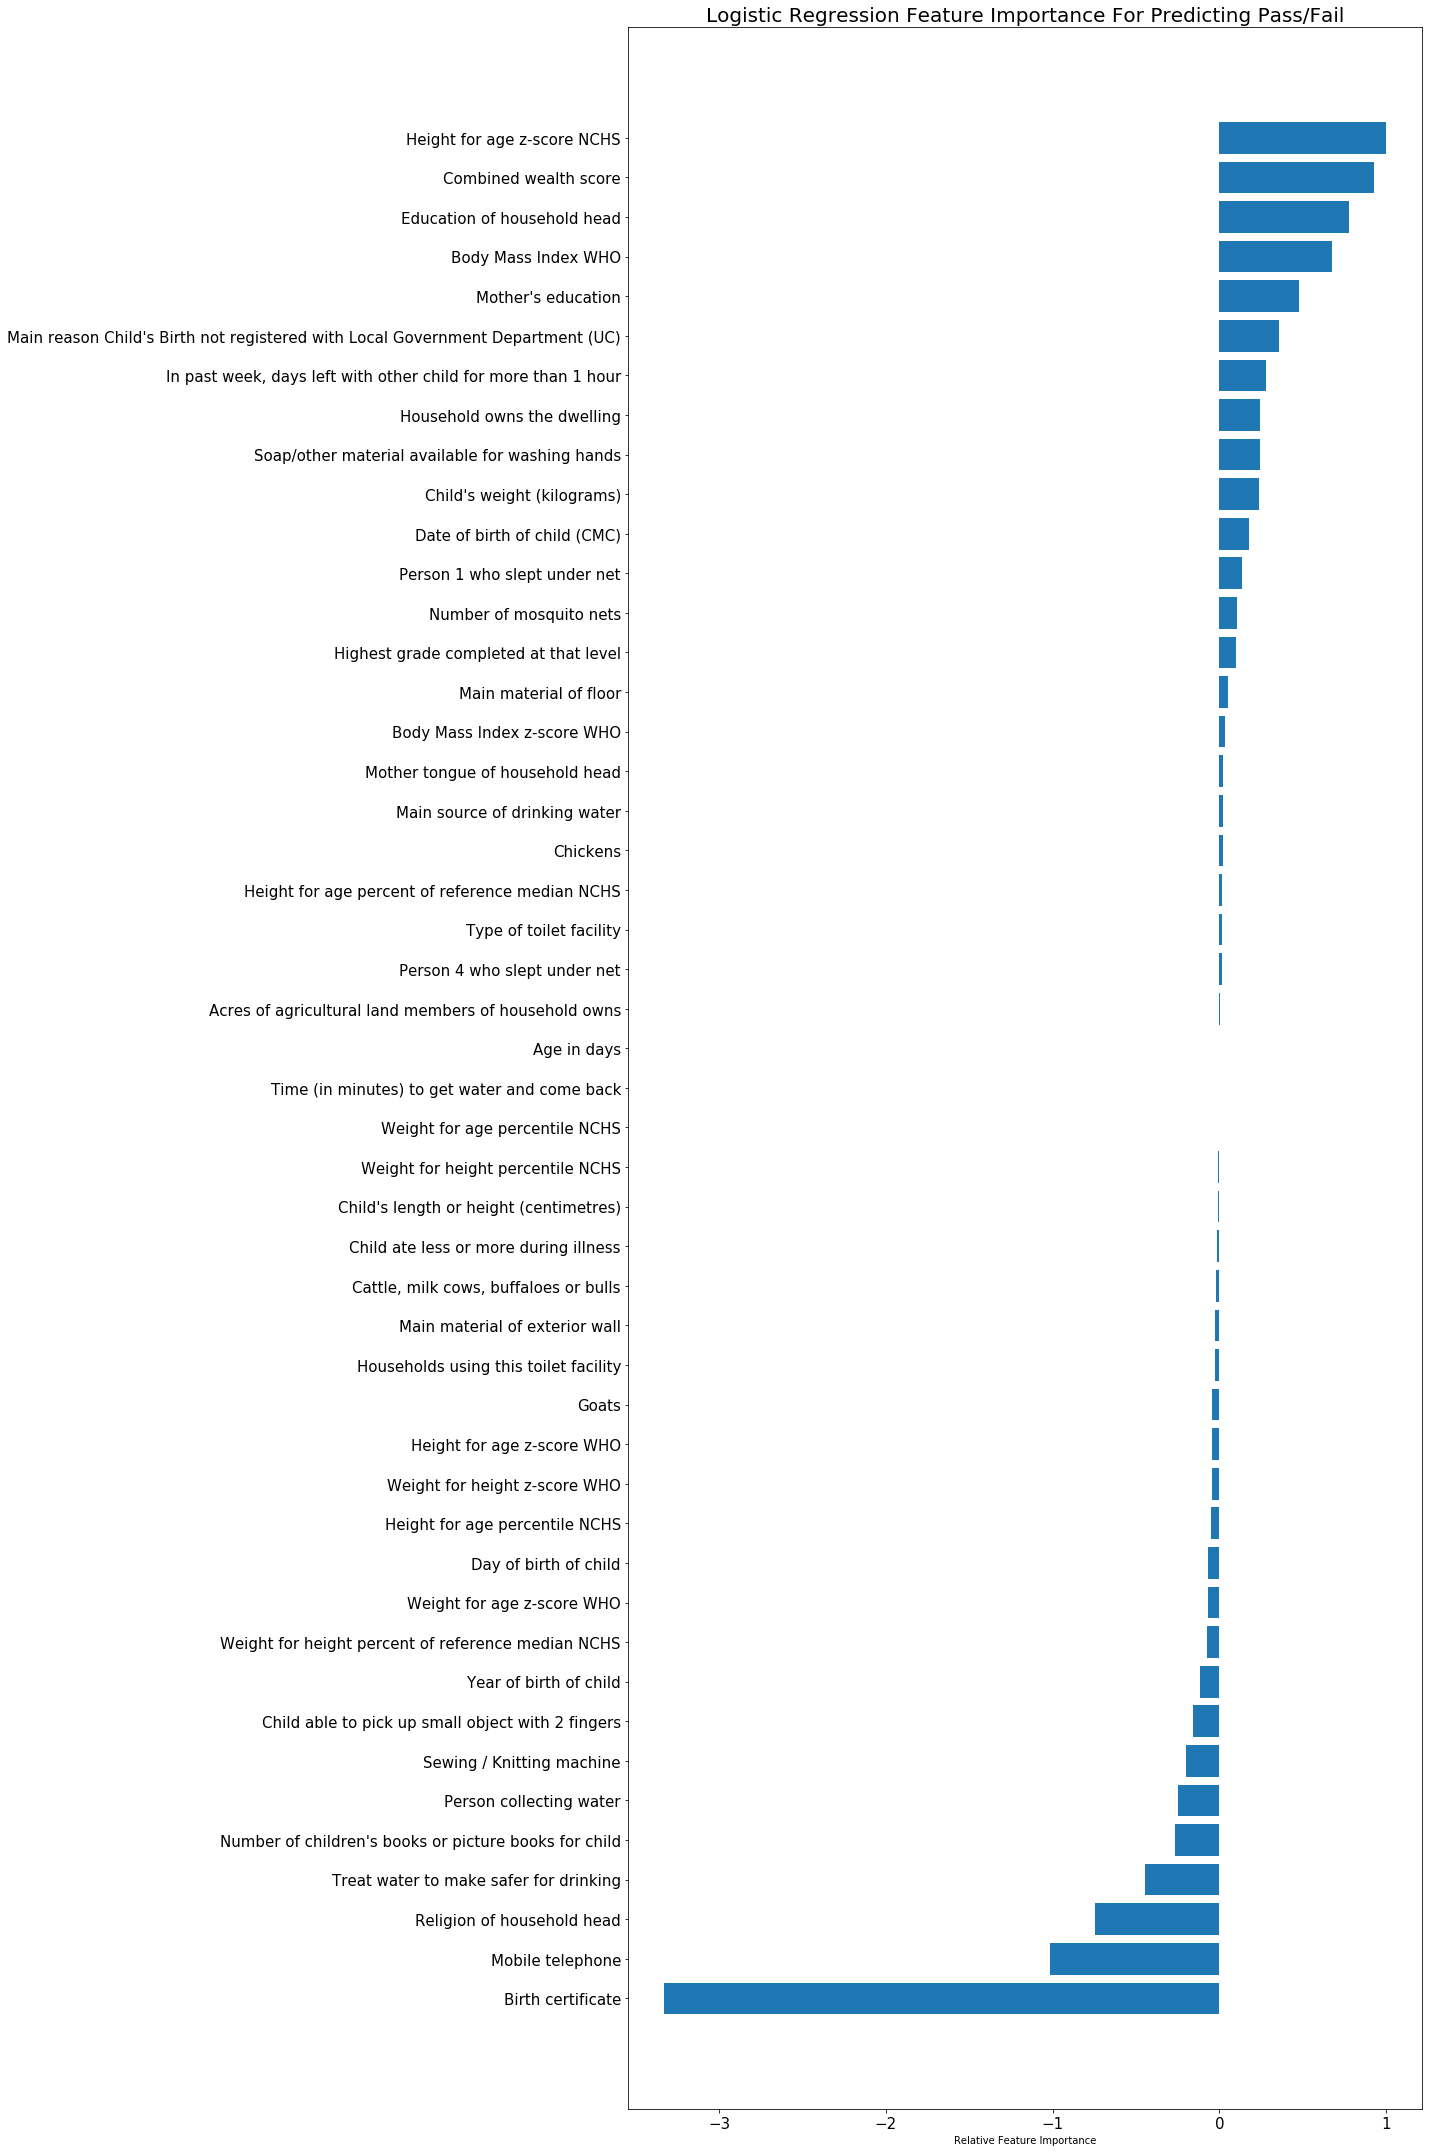

In [171]:
featfig = plt.figure(figsize=(20,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(label_list, fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.title('Logistic Regression Feature Importance For Predicting Pass/Fail', fontsize=20)
plt.tight_layout()   
plt.show()